# Moon Image Analysis

In [1]:
import json
import glob
import string
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.feature import match_template, canny
from skimage.filters import threshold_otsu, rank, sobel
from skimage.morphology import disk, watershed
from scipy import ndimage as ndi
%matplotlib inline

## Template Matching

In [2]:
data_dir = 'data/'
template_dir = 'templates/'
moon_dir = data_dir+'moon/'
moon_template_dir = template_dir+'moon/'

In [3]:
moon_images = glob.glob(moon_dir+'*.jpg')

In [4]:
moon_template_images = glob.glob(moon_template_dir+'[0-9]*.jpg')

In [5]:
def match_images(filenames, templates, threshold=0.5):
    matches = {template: [] for template in templates}
    
    template_images = []
    for template in templates:
        template_images.append(io.imread(template))

    for filename in filenames:
        match_results = []
        image = io.imread(filename, as_grey=True)
        for template in template_images:
            match_results.append(match_template(image, template))
        
        # Find the template with the greatest match.
        match_results = np.array(match_results)
        max_idx = np.unravel_index(match_results.argmax(), match_results.shape)
        if match_results[max_idx] > threshold:
            template_match = templates[max_idx[0]]
            image_id = filename.translate(None, string.letters).translate(None, string.punctuation)
            matches[template_match].append(image_id)
    
    return matches

In [ ]:
moon_template_matches = match_images(moon_images, moon_template_images)

## Filtering

In [6]:
sample_moon = io.imread(moon_dir+'121.jpg', as_grey=True)

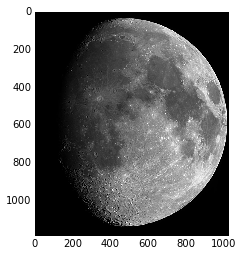

In [7]:
io.imshow(sample_moon)

(array([ 468467.,   32411.,   36984.,   38353.,   51649.,   59668.,
          64154.,   52243.,   55179.,   56755.,   58714.,   55535.,
          55260.,   45633.,   34029.,   20139.,   13640.,    8151.,
           3512.,    1940.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ]),
 <a list of 20 Patch objects>)

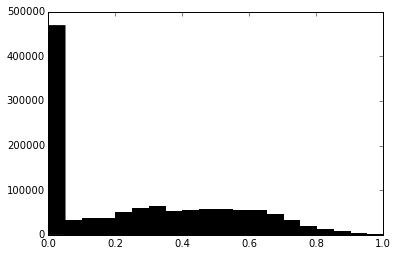

In [8]:
plt.hist(sample_moon.ravel(), bins=20,  fc='k')

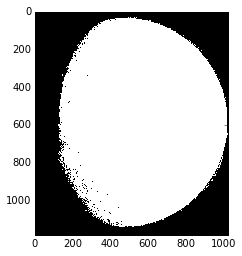

In [9]:
io.imshow(sample_moon > 0.01)

## Otsu's Method

In [10]:
local_otsu_moon = rank.otsu(sample_moon, disk(10))

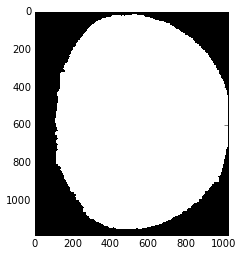

In [11]:
io.imshow(sample_moon < local_otsu_moon)

In [12]:
global_otsu_moon = threshold_otsu(sample_moon)

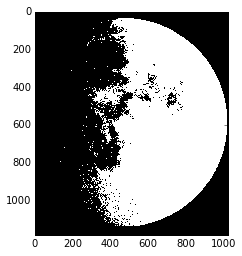

In [13]:
io.imshow(sample_moon >= global_otsu_moon)

In [14]:
moon_edges = canny(sample_moon, sigma=0.5)

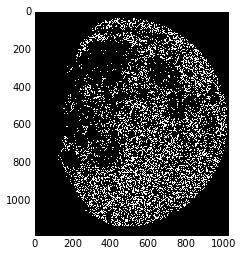

In [15]:
io.imshow(moon_edges)

In [16]:
moon_filled = ndi.binary_fill_holes(moon_edges)

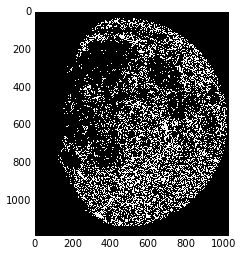

In [17]:
io.imshow(moon_filled)

## Region-based Segmentation

In [18]:
elevation_map = sobel(sample_moon)

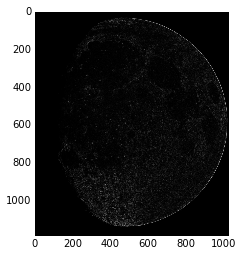

In [19]:
io.imshow(elevation_map)

In [20]:
segment_markers = np.zeros_like(sample_moon)

In [21]:
segment_markers[sample_moon < 0.01] = 1
segment_markers[sample_moon > 0.2] = 2

In [22]:
segmentation = watershed(elevation_map, segment_markers)

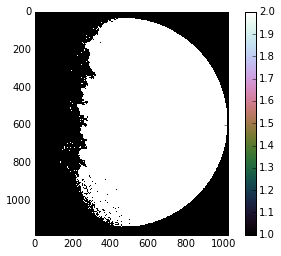

In [23]:
io.imshow(segmentation)